In [ ]:
import pylab as pl
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [7]:
# crack the dataset open
df = pd.read_excel('data/Audatex_Claims.Updated(2021).xlsx')

# basic exploration
print(df.info())  # check data types and missing values
print(df['TOTALCOSTOFCLAIM'].describe())  # summary stats for target
print(df.isnull().sum())  # check missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89450 entries, 0 to 89449
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   CREATIONDATE             89450 non-null  datetime64[ns]
 1   ASSESSMENTNUMBER         89450 non-null  object        
 2   ORIGINATOR               89450 non-null  object        
 3   CLAIMREFERENCENUMBER     89449 non-null  object        
 4   CLAIMNUMBER              89449 non-null  object        
 5   WORKPROVIDER             89450 non-null  object        
 6   BROKER                   89141 non-null  object        
 7   CALCULATIONDATE          89450 non-null  datetime64[ns]
 8   MANUFACTURERNAME         89450 non-null  object        
 9   MODELNAME                89450 non-null  object        
 10  SUBMODELTEXT             89159 non-null  object        
 11  YEARREG                  89144 non-null  float64       
 12  MONTHREG                 89144 n

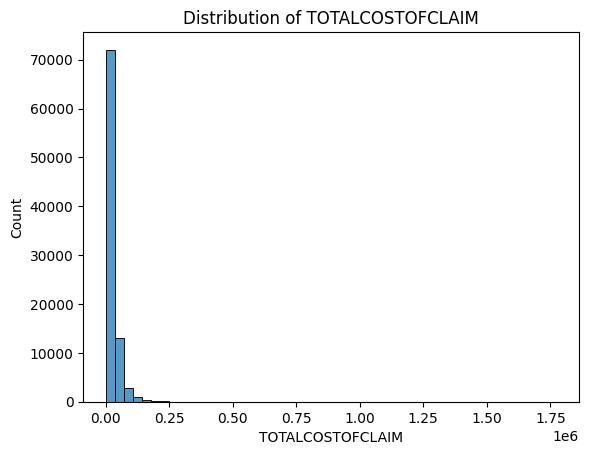

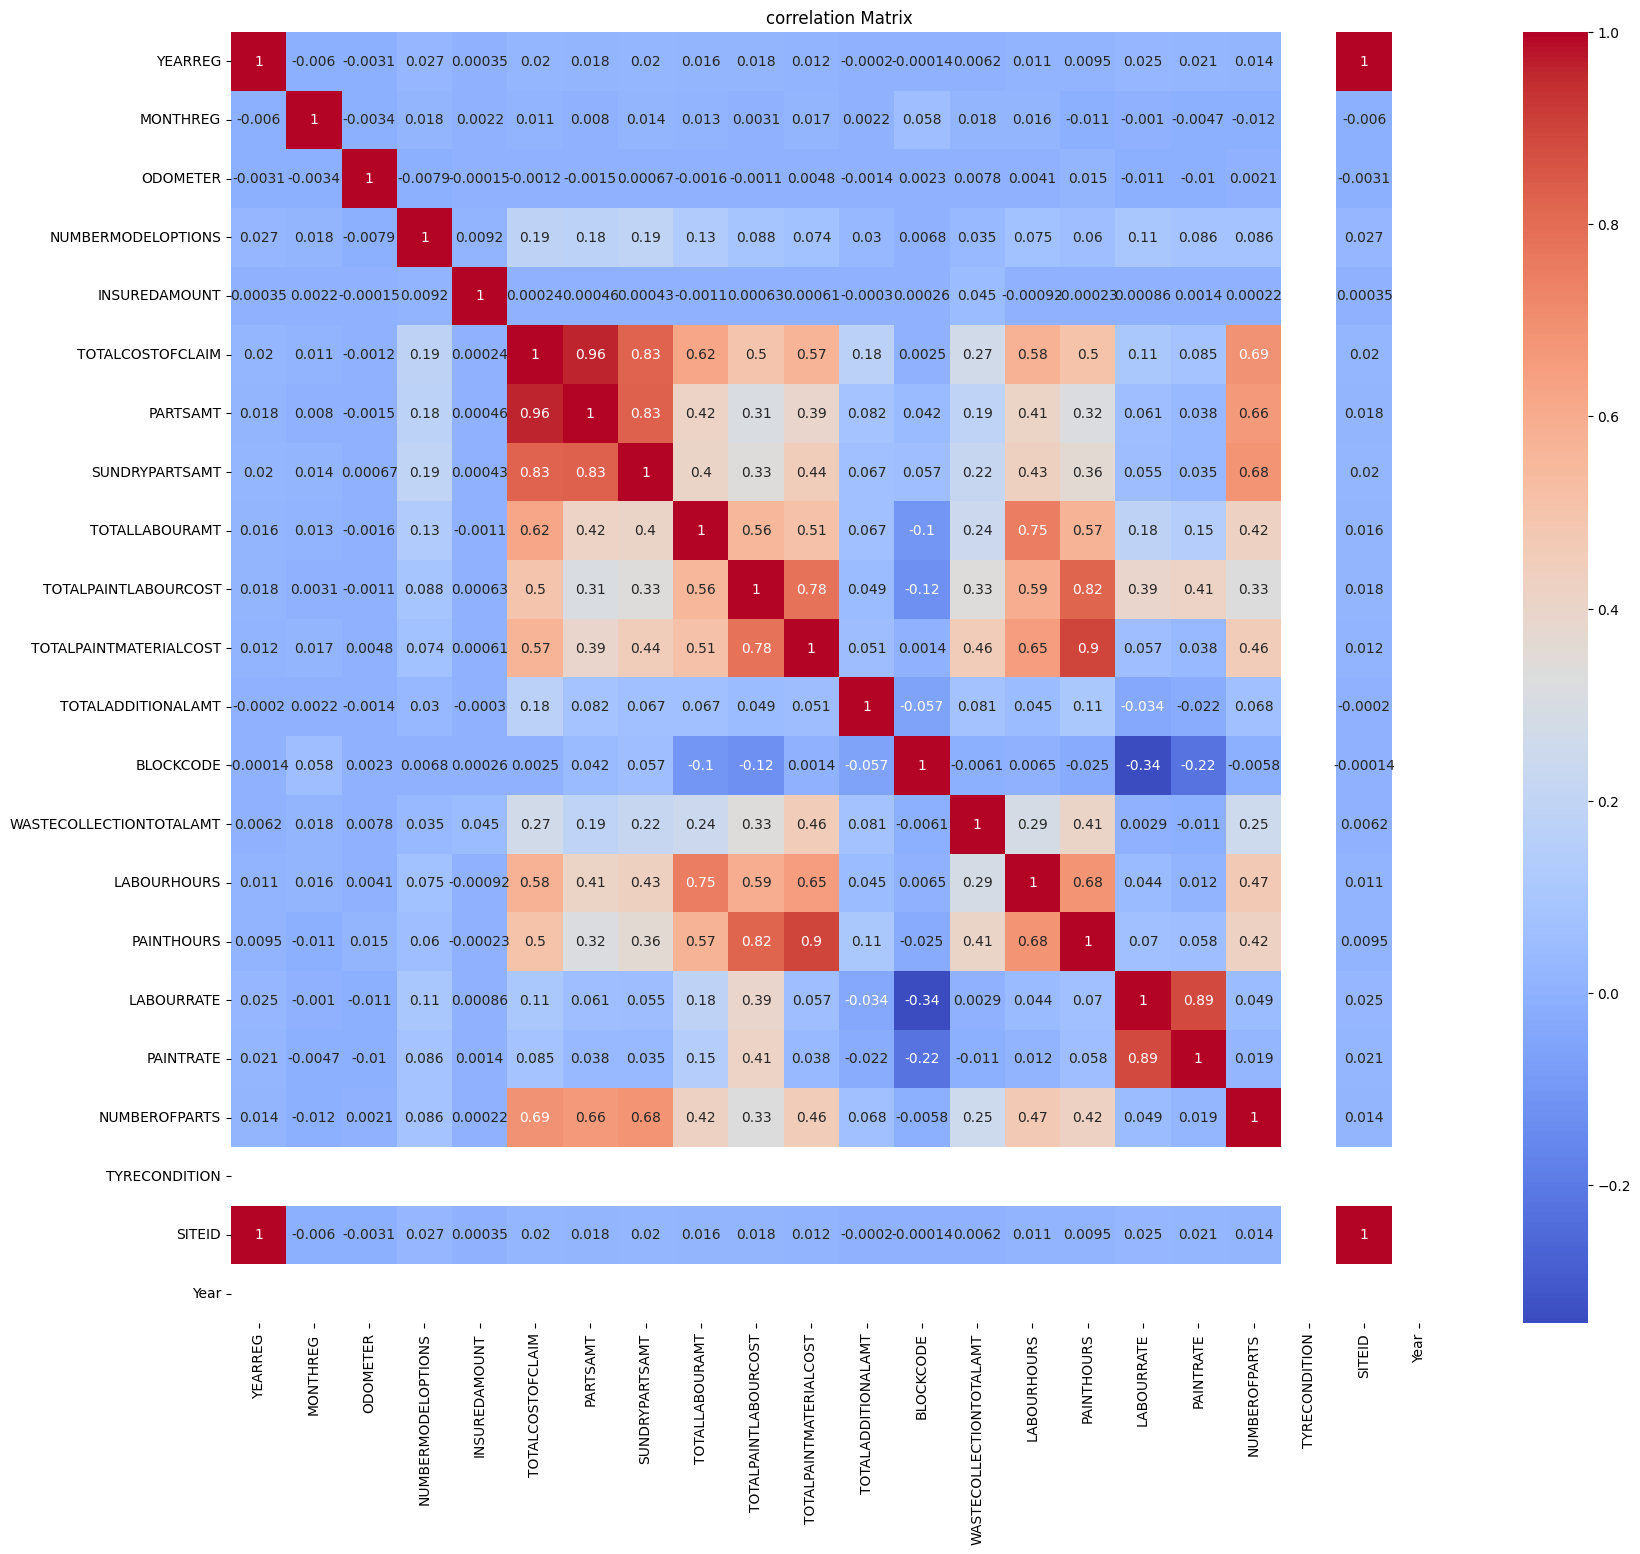

In [8]:

# visualize target distribution
sns.histplot(df['TOTALCOSTOFCLAIM'], bins=50)
pl.title('Distribution of TOTALCOSTOFCLAIM')
pl.show()

# correlation with numerical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
pl.title('correlation Matrix')
pl.subplots_adjust(right=2.5, top=2.8)
pl.show()

In [9]:
df['CREATIONDATE'] = pd.to_datetime(df['CREATIONDATE'])
df['CALCULATIONDATE'] = pd.to_datetime(df['CALCULATIONDATE'])
df['creation_year'] = df['CREATIONDATE'].dt.year
df['creation_month'] = df['CREATIONDATE'].dt.month
df['creation_day'] = df['CREATIONDATE'].dt.day
df['time_diff_days'] = (df['CALCULATIONDATE'] - df['CREATIONDATE']).dt.days

# drop original datetime columns
df = df.drop(['CREATIONDATE', 'CALCULATIONDATE'], axis=1)

In [10]:
# impute numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# impute categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna('Unknown')

# drop WASTECOLLECTIONTOTALAMT missing ~ 35 %
df = df.drop(['WASTECOLLECTIONTOTALAMT'], axis=1)

In [11]:

le = LabelEncoder()
for col in ['ASSESSMENTNUMBER', 'CLAIMREFERENCENUMBER', 'CLAIMNUMBER', 'JDENUMBER']:
    df[col] = le.fit_transform(df[col].astype(str))

# nne-hot encode remaining categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
df['TOTALCOSTOFCLAIM'] = np.log1p(df['TOTALCOSTOFCLAIM'])

# visualize transformed-1
sns.histplot(df['TOTALCOSTOFCLAIM'], bins=50)
pl.title('Log-Transformed TOTALCOSTOFCLAIM')
pl.show()